<a href="https://colab.research.google.com/github/JECABRIFA/Diplomado_IA/blob/main/S7_C1_DecisionTree_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árbol de Decisión - Evaluación del riesgo de ataque cardíaco

In [28]:
## Importar las librerías necesarias
import pandas as pd # manipular datos, dataframe
import matplotlib.pyplot as plt # graficar Seaborn


from sklearn.model_selection import train_test_split
# train: Datos para entrenar
# test: probar
# split: partición de los datos

from sklearn.tree import DecisionTreeClassifier
# .tree: usar árboles de decisión

from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score

data = {
    'Age': [16, 17, 20, 25, 35, 40, 45, 50, 22, 28, 30, 33, 38, 42, 46, 52, 18, 26, 55, 60],
    'Weight': [55, 65, 70, 80, 68, 85, 72, 90, 60, 78, 74, 82, 77, 88, 75, 92, 68, 83, 95, 100],
    'Smoker': [0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # 0 = No fumador, 1 = Fumador
    'Risk': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # 0 = Bajo riesgo, 1 = Alto riesgo
}


# Convertir el dataset a un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar los datos
print("Datos del dataset:")
print(df)

Datos del dataset:
    Age  Weight  Smoker  Risk
0    16      55       0     0
1    17      65       0     1
2    20      70       0     0
3    25      80       1     1
4    35      68       0     0
5    40      85       1     1
6    45      72       0     0
7    50      90       1     1
8    22      60       0     0
9    28      78       1     1
10   30      74       0     0
11   33      82       1     1
12   38      77       0     0
13   42      88       1     1
14   46      75       0     0
15   52      92       1     1
16   18      68       0     0
17   26      83       1     1
18   55      95       0     0
19   60     100       1     1


**Q1** ¿A qué decision podríamos llegar con estos datos?
RTA: Gestionar el riesgo de una paciente

**Q2** ¿Que tipo de problema debemos abordar?
RTA: Clasificación

# Actividad 1. Separar las características (X) de la variable objetivo (y)

* Cuál es la variable objetivo? Rta:  Risk
* Cuáles son los parámetros(Columnas, características, entradas)?: Age, Weight, Smoker


# Actividad 2. Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)

In [29]:
# y por notación el target (hipotesis/predicción)
y = df['Risk']

# en X se agrupan las caracterísitcas
x = df[['Age', 'Weight', 'Smoker']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Actividad 3. Seleccione y ajuste el modelo: árbol de decision

* Ejecute lás líneas de código, si desea cambie el nombre del modelo



In [31]:
# Crear el modelo de árbol de decisión
modeloDTC = DecisionTreeClassifier()

# Entrenar el modelo (fit: ajuste)
modeloDTC.fit(x_train, y_train)

DecisionTreeClassifier()

# Actividad 4. Hacer predicciones sobre los datos de prueba

* Aplique al modelo la palabra predict y evalue en los datos de prueba y guardelos en y_pred


```
modelo.predict(datos_de_prueba)
```



In [32]:
modeloDTC

DecisionTreeClassifier()

In [33]:
x_test

,Age,Weight,Smoker
0,16,55,0
17,26,83,1
15,52,92,1
1,17,65,0


In [34]:
x_train

,Age,Weight,Smoker
8,22,60,0
5,40,85,1
11,33,82,1
3,25,80,1
18,55,95,0
16,18,68,0
13,42,88,1
2,20,70,0
9,28,78,1
19,60,100,1


In [35]:
y_test

,Risk
0,0
17,1
15,1
1,1


In [36]:
# Usar el modelo con el método .predic va

y_pred = modeloDTC.predict(x_test)
y_pred

array([0, 1, 1, 0])

# Actividad 5. Evalue el modelo

* Use la medida de accuracy para medir el desempeño del modelo

```
accuracy_score(y_test, y_pred)
```
* Genere un reporte de medidas del modelo con

```
classification_report(y_test, y_pred)
```


* Imprima las mediciones y acopmpañe de valores que orienten al usuario

In [37]:
print("Reporte de Clasification")
target_names = ['Bajo Riesgo (0)', 'Alto Riesgo (1)']

print(classification_report(y_test, y_pred,  target_names = target_names))
report = classification_report(y_test, y_pred)

Reporte de Clasification
                 precision    recall  f1-score   support

Bajo Riesgo (0)       0.50      1.00      0.67         1
Alto Riesgo (1)       1.00      0.67      0.80         3

       accuracy                           0.75         4
      macro avg       0.75      0.83      0.73         4
   weighted avg       0.88      0.75      0.77         4



# Actividad 6. Visualizar el árbol de decisión



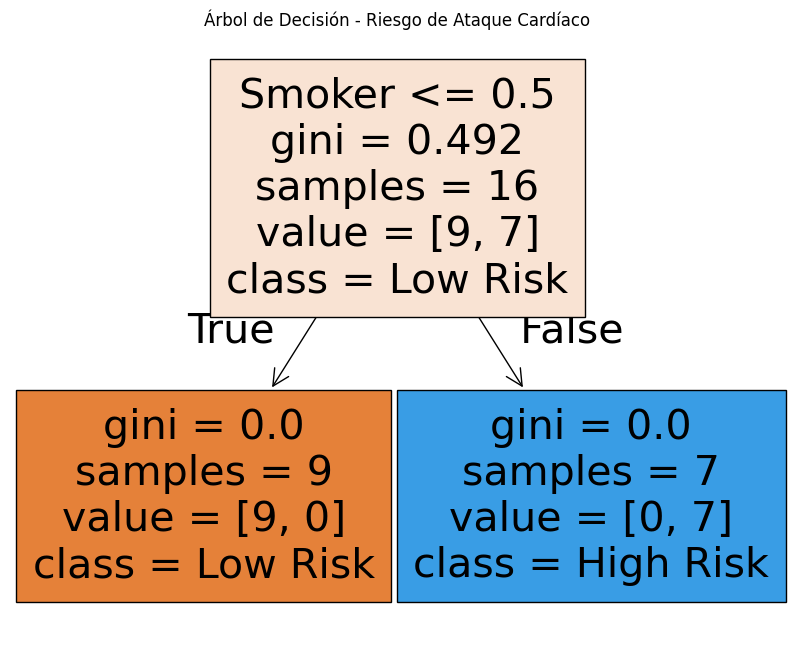

In [38]:
plt.figure(figsize=(10, 8))
tree.plot_tree(modeloDTC, feature_names=['Age', 'Weight', 'Smoker'], class_names=['Low Risk', 'High Risk'], filled=True)
plt.title("Árbol de Decisión - Riesgo de Ataque Cardíaco")
plt.show()

# Actividad 7. Ejemplo de predicción

* Escriba un código para evaluar un dato del modelo

* Use estos comentarios que orienten al usuario



```
print("\nPredicción con un ejemplo nuevo:")
print(f"Predicción (0 = Bajo Riesgo, 1 = Alto Riesgo): {prediction[0]}")

```



# Parte 2. Cambiar el tamaño del dataset

* Use el archivo >> DataSet/Classification/Health/heart_attack_risk_dataset.csv

* Ejecute nuevamente y analise los resultados